# 엔트로피
- 확률 분포들이 가지는 확신의 정도
- 결정론에 가까울수록 엔트로피는 낮아짐

## 1. 수학적 정의
- 에 정보량만큼 가중치 부여한 일종의 가중평균
- P(y): 확률질량함수 or 확률밀도함수 
- $\log_2P(y_k)$: 정보량


- Y 이산확률 변수

$$
H[Y] = -\sum_{k=1}^K \log_2P(y_k) \times P(y_k) 
$$

- Y 연속확률 변수
$$
H[Y] = -\int_{\infty}^{\infty} \log_2 P(y) \times P(y) dy
$$

예시)

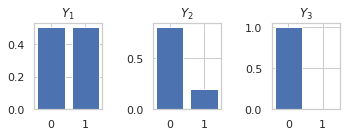

In [20]:
%matplotlib inline
plt.figure(figsize=(5,2))
plt.subplot(131)
plt.bar([0, 1], [0.5, 0.5])
plt.title('$Y_1$')

plt.subplot(132)
plt.bar([0, 1], [0.8, 0.2])
plt.title('$Y_2$')

plt.subplot(133)
plt.bar([0, 1], [1, 0])
plt.title('$Y_3$')

plt.xticks([0, 1])
plt.tight_layout()
plt.show()

$$H[Y_1] = -\left( \dfrac{1}{2} \log_2 \dfrac{1}{2} +  
\dfrac{1}{2} \log_2 \dfrac{1}{2}
\right) = 1$$

$$H[Y_2] = -\left( \dfrac{8}{10} \log_2 \dfrac{8}{10} +  
\dfrac{2}{10} \log_2 \dfrac{2}{10}
\right) = 0.72$$

$$H[Y_3] = -\left( 1 \log_2 1 +  
0 \log_2 0
\right) = 0$$

In [28]:
print("Y1: ", -(0.5 * np.log2(0.5) + 0.5 * np.log2(0.5)))
print("Y2: ", -(0.8 * np.log2(0.8) + 0.2 * np.log2(0.2)))

Y1:  1.0
Y2:  0.7219280948873623


In [30]:
# p(y)=0
eps = np.finfo(float).eps
-( 1 * np.log2(1) - eps*np.log2(eps))

-1.1546319456101628e-14

## 2. 성질
- 최솟값: 0 -> 결정론적 값
- 최댓값: 확신할 수 없음. 아무것도 모르는 상태.
    - 이산확률변수의 클래스 갯수에 따름
    - len(class) = $2^K$
    - 각 클래스가 모두 같은 확률 가질 때 최댓값
    $$
    H = - \dfrac{2^K}{2^K} \log_2 \dfrac{1}{2^K} = K
    $$
    
## 3. 정보량
- 엔트로피는 확률변수가 담을 수 있는 정보량
- 즉, 표본값을 관측해서 얻을 수 있는 추가정보
    - 엔트로피0: 관측하지 않아도 앎. 확률변수 **표본값** 항상 일정
    - 엔트로피 최대: 관측해야만 알 수 있음. 동전을 던져봐야 앎.
    
## 4. 무손실 인코딩
**예시)** 

- 어떤 문서 1000자를 알파벳 A, B, C, D를 이진수로 변환(2000자). 각 확률은:
    - A("00"): 1/2
    - B("01"): 1/4
    - C("10"): 1/8
    - D("11"): 1/8


- 가변길이 인코딩(variable length encoding): 
    - A("0"): 1/2
    - B("10"): 1/4
    - C("110"): 1/8
    - D("111"): 1/8


- 문자수 줄어듦:
$$
문자수 \times 확률 \cdot 이진수 자릿수
$$

$$
(1000 \times \dfrac{1}{2}) \cdot 1 + (1000 \times \dfrac{1}{4}) \cdot 2 + (1000 \times \dfrac{1}{8}) \cdot 3 + (1000 \times \dfrac{1}{8}) \cdot 3 = 1750
$$

- 1.75이란:
     - 알파벳 한 글자 인코딩에 필요한 평균 비트수 = 엔트로피 값
     
**예시2)**

- A~H 8글자: {1/2, 1/4, 1/8, 1/16, 1/64 , 1/64, 1/64, 1/64}
    - A: 0
    - B: 10
    - C: 110
    - D: 1110
    - E: 111100
    - F: 111101
    - G: 111110
    - H: 111111
- 평균 비트수:

In [33]:
ls = [1/2,1/4,1/8,1/16,1/64,1/64,1/64,1/64]
def H(ls):
    ans = 0
    for i in range(len(ls)):
        ans += ls[i]*np.log2(ls[i])
    return -ans
H(ls)

2.0

## 5. 엔트로피 추정
- 확률질량함수 추정하여 엔트로피 계산

예)
 - 총 data 80개
 - Y=0: 40개
 - Y=1: 40개
 - $H[Y] = -(\dfrac{1}{2} \log_2 \dfrac{1}{2}+ \dfrac{1}{2} \log_2 \dfrac{1}{2}) =1$
 
## 6. 지니불순도
- 계산량이 적어(log(x)) 엔트로피 대용으로 사용
 $$
 G[Y] = \sum_{k=1}^KP(y_k)(1-P(y_k))
 $$
- vs 
 $$
H[Y] = -\sum_{k=1}^K \log_2P(y_k) \times P(y_k) 
$$

## 7. 결합 엔트로피
- 두 이산확률변수 X, Y에 대한 결합 엔트로피(joint entropy):
$$H[X, Y]= -\sum_{i=1}^{K_x} \sum_{j=1}^{K_y} P(x_i,y_i) \log_2P(x_i, y_i)$$

- 연속확률변수:
$$
H[X,Y] = -\int_x \int_y p(x, y)log_2p(x,y) \; dxdy
$$

## 8. 조건부 엔트로피: scalar
- 상관관계 있는 두 확률변수 X, Y
- X알 때, Y의 확률변수가 가질 수 있는 정보량
- 조건부 가중평균
$$
H[Y \mid X] = - \sum_{i=1}^{K_x}\sum_{j=1}^{K_y}P(x_i, y_j) \log_2P(y_i \mid x_i)
$$

$$
H[Y \mid X] = - \int_x \int_y p(x, y) \log_2 p(y \mid x) \; dxdy
$$

- x가 정해졌을 때 y 엔트로피값의 가중평균
$$
H[Y \mid X] = - \sum_{i=1}^{K_x}P(x_i)H[Y \mid X=x_i]
$$

$$
H[Y \mid X] = - \int_x p(x)H[Y \mid X=x] \; dx
$$

- 예시) 스팸 메일 분류문제
    - 총 80개 메일
        - 정상(Y=0): 40 개
        - 스팸(Y=1): 40 개
        - 키워드 후보: $X_1, X_2, X_3$
- case 1: 
    - $H[Y \mid X_1]$: 키워드 X1의 유무로 스팸메일 걸러낼 수 있는가
    
    - $p(X_1=0) \cdot H[Y \mid X_1=0] + p(X_1=1) \cdot H[Y \mid X_1=1]$
        
    - 40/80 * 0.81 + 40/80 * 0.81 = 0.81
    
| cat | Y=0 | Y=1 |
| --- | --- |--- |
| $X_1$=0 | 30 | 10 |
| $X_1$=1 | 10 | 30 |



In [40]:
# H[Y|X1=0]
- (3/4 * np.log2(3/4) + 1/4 * np.log2(1/4))

0.8112781244591328

- case 2: 
    - $H[Y \mid X_2]$: 키워드가 사번
    
    - $p(X_2=0) \cdot H[Y \mid X_2=0] + p(X_2=1) \cdot H[Y \mid X_2=1]$
        
    - 60/80 * 0.92 + 20/80 * 0 = 0.69
    
| cat | Y=0 | Y=1 |
| --- | --- |--- |
| $X_2$=0 | 20 | 40 |
| $X_2$=1 | 20 | 0 |

# 9. 크로스 엔트로피
- 인수: 확률변수(X), 확률분포:함수(O)
- 기준이 되는 분포는 앞: 순서 바뀌면 값 달라짐

$$
H[P,Q] = - \sum_{k=1}^{K} P(y_k) \log_2 Q(y_k)
$$
$$
H[p,q] = - \int_y p(y)\log_2q(y) \; dy
$$

- 용도: 같은 확률변수에 대한 두 개의 추정 확률 분포 비교. 분류 모형 성능 측정가능.
    - P: Y 분포 vs Q: $\hat{y}$분포
    - 예) 이진분류
    
$$
H[P, Q] = -\{P_Y(Y=0) \cdot \log_2 {P_{\hat{Y}}(Y=0)} + P_Y(Y=1) \cdot \log_2{P_{\hat{Y}}(Y=1)} \}
$$

$$
\begin{cases}
& -\log_2 (1- \mu) & \text{Y=0} \rightarrow P_Y(Y=0) = 1\\
& -\log_2 (\mu) & \text{Y=1} \rightarrow P_1(Y=1) = 1\\
\end{cases}
$$

$$
\therefore H[P,Q] = -\dfrac{1}{N} \sum_{i=1}^N \left( y_i \log_2 \mu_i + (1-y_i)\log_2 (1-\mu_i) \right)
$$

# 10. 쿨백-라이블러 발산
- 두 확률분포 p(y), q(y)의 차이를 정량화
- H[P|P] =  H[P]
- 결과값은 항상 양수이며, p(x), q(x)가 완전히 같을 경우에만 0
$$
KL(P || Q) = H[P,Q] - H[P] = \sum_{i=1}^K P(y_i) \log_2 \left( \dfrac{P(y_i)}{Q(y_i)} \right)
$$

